# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math


# Utilizando o DataFrame criado anteriormente

In [3]:
drugbank_df = pd.read_pickle('db_df')

# Transformando as colunas de dados númericos do DataFrame em float

In [4]:
cols = ['molecular_weight','logP','logS','pKa_Acid','pKa_Basic','physiological_charge',
'polar_surface_area','hydrogen_acceptor_count','hydrogen_donor_count','rotable_bond_count',
'refractivity','polarizability','number_of_rings','bioavailability']

for col in cols:
    drugbank_df[col] = drugbank_df[col].astype(np.float64)

In [5]:
def transforma_col(linha):
    if linha:
        return linha[:-4]
    else:
        return linha

drugbank_df['water_solubility'].apply(transforma_col).astype(np.float64).value_counts()

0.10500    20
0.01110    19
0.01120    17
0.01220    16
0.10400    15
           ..
0.00950     1
0.00003     1
0.00725     1
0.00776     1
0.03640     1
Name: water_solubility, Length: 4219, dtype: int64

# 1 Fazendo histogramas dos dados
1.1 Molecular weight

É estacionário

<AxesSubplot:>

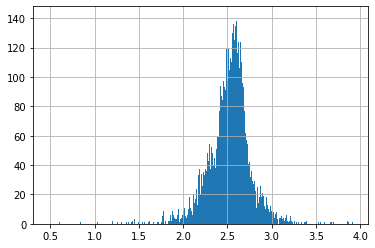

In [6]:
dfmw = drugbank_df['molecular_weight']

c0 = dfmw.isna() == False
c1 = dfmw > 0
dfmw = dfmw[c0 & c1] 

mwlog = dfmw.apply(np.log10)
mwlog.hist(bins = 700)

1.2 LogP

É estacionário

<AxesSubplot:>

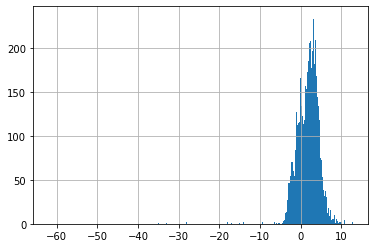

In [7]:
dflogp = drugbank_df['logP']

c0 = dflogp.isna() == False
dflogp = dflogp[c0] 

dflogp.hist(bins = 700)


1.3 LogS

É estacionário

<AxesSubplot:>

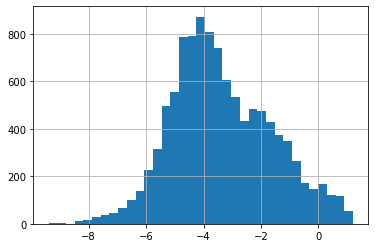

In [8]:
dflogs = drugbank_df['logS']

c0 = dflogs.isna() == False
dflogs = dflogs[c0] 

dflogs.hist(bins = 35)


1.4 pka acid

É estacionario

<AxesSubplot:>

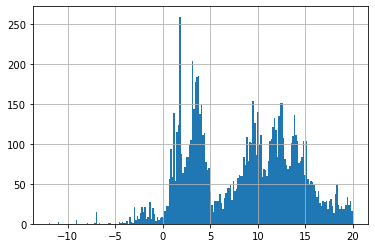

In [9]:
dfpka = drugbank_df['pKa_Acid']

c0 = dfpka.isna() == False
dfpka = dfpka[c0] 

dfpka.hist(bins = 200)


1.5 pka basic

É estacionario

<AxesSubplot:>

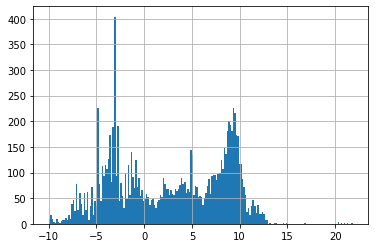

In [10]:
dfpkb = drugbank_df['pKa_Basic']

c0 = dfpkb.isna() == False
dfpkb = dfpkb[c0] 

dfpkb.hist(bins = 200)


1.6 Physiological Charge

É estacionario

<AxesSubplot:>

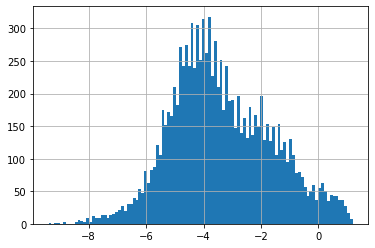

In [11]:
dfphy = drugbank_df['physiological_charge']

c0 = dfphy.isna() == False
dfphy = dfphy[c0] 

dfphy.hist(bins = 105)

1.7 Polar Surface Area

É estacionario

<AxesSubplot:>

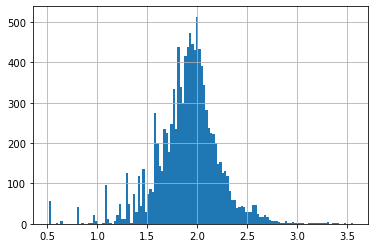

In [12]:

dfpsa = drugbank_df['polar_surface_area']
c0 = dfpsa.isna() == False
dfpsa = dfpsa[c0] 
c1 = dfpsa > 0
dfpsa = dfpsa[c0 & c1] 

dfpsalog = dfpsa.apply(np.log10)
dfpsalog.hist(bins= 130)

1.8 Hydrogen Acceptor Count

<AxesSubplot:>

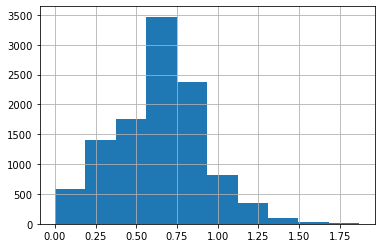

In [13]:
dfhac = drugbank_df['hydrogen_acceptor_count'][drugbank_df['hydrogen_acceptor_count'] <= 75]
c0 = dfhac.isna() == False
dfhac = dfhac[c0] 
c1 = dfhac > 0
dfhac = dfhac[c0 & c1] 

dfhaclog = dfhac.apply(np.log10)
dfhaclog.hist(bins= 10)


1.9 Hydrigen Donor Count

<AxesSubplot:>

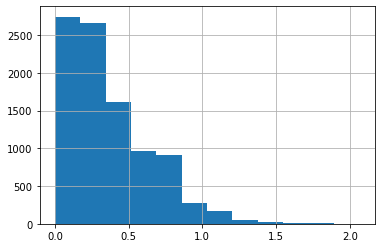

In [14]:


dfhdc = drugbank_df['hydrogen_donor_count']
c0 = dfhdc.isna() == False
dfhdc = dfhdc[c0] 
c1 = dfhdc > 0
dfhdc = dfhdc[c0 & c1] 

dfhdclog = dfhdc.apply(np.log10)
dfhdclog.hist(bins= 12)


1.10 Rotable Bond Count

<AxesSubplot:>

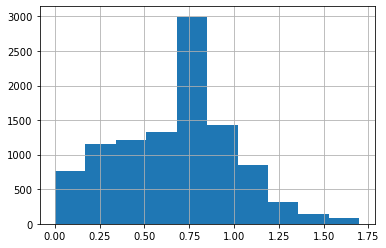

In [15]:
dfrbc = drugbank_df['rotable_bond_count'][drugbank_df['rotable_bond_count'] <= 50]

c0 = dfrbc.isna() == False
c1 = dfrbc > 0
dfrbc = dfrbc[c0 & c1] 

rbclog = dfrbc.apply(np.log10)
rbclog.hist(bins = 10)

1.11 Refractivity

<AxesSubplot:>

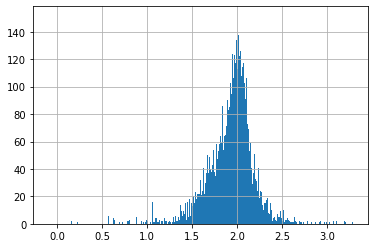

In [16]:
dfref = drugbank_df['refractivity']
c0 = dfref.isna() == False
c1 = dfref > 0
dfref = dfref[c0 & c1] 

reflog = dfref.apply(np.log10)
reflog.hist(bins = 700)



1.12 Polarizability

<AxesSubplot:>

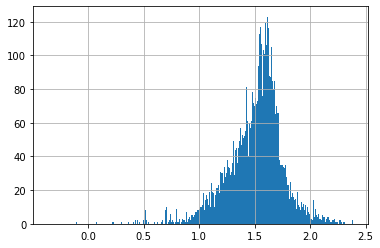

In [17]:
dfpol = drugbank_df['polarizability'][drugbank_df['polarizability'] <= 250]
c0 = dfpol.isna() == False
c1 = dfpol > 0
dfpol = dfpol[c0 & c1] 

pollog = dfpol.apply(np.log10)
pollog.hist(bins = 700)


1.13 Number of Rings

<AxesSubplot:>

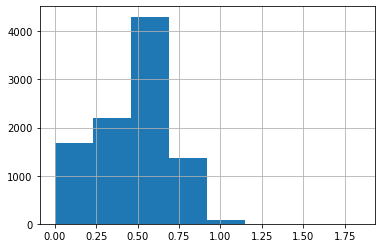

In [18]:
dfnor = drugbank_df['number_of_rings']
c0 = dfnor.isna() == False
c1 = dfnor > 0
dfnor = dfnor[c0 & c1] 

norlog = dfnor.apply(np.log10)
norlog.hist(bins = 8)


1.14 Bioavailability

<AxesSubplot:>

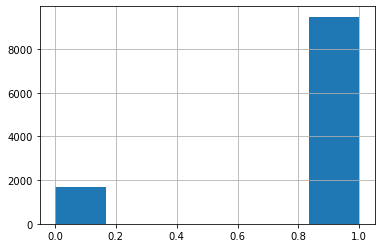

In [19]:
drugbank_df['bioavailability'].hist(bins = 6)

# 2 Dados estatísticos

In [76]:
numerical_columns = drugbank_df.describe().columns
df_numerical = drugbank_df[numerical_columns]
df_numerical.describe()

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability
count,11172.000000,11170.000000,10758.000000,9404.000000,10362.000000,10758.000000,11173.000000,11173.000000,11173.000000,11173.000000,11173.000000,11169.000000,11173.000000,11173.000000
mean,385.041182,1.812489,-3.381529,8.462630,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564
std,316.550921,2.650778,1.736293,5.428678,5.742671,1.736293,126.138432,6.054114,4.070047,8.888413,78.738375,30.736014,2.236808,0.358490
min,3.016000,-62.000000,-9.400000,-12.000000,-10.000000,-9.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.000000,0.000000
25%,246.253925,0.112500,-4.600000,3.510000,-2.900000,-4.600000,53.070000,3.000000,1.000000,3.000000,61.880000,23.660000,1.000000,1.000000
50%,342.924500,2.070000,-3.600000,9.200000,3.090000,-3.600000,83.120000,4.000000,2.000000,5.000000,91.580000,35.100000,3.000000,1.000000
75%,443.977000,3.540000,-2.200000,12.700000,8.350000,-2.200000,116.450000,6.000000,3.000000,8.000000,117.960000,45.140000,4.000000,1.000000
max,8272.338000,12.870000,1.200000,20.000000,21.850000,1.200000,3617.470000,191.000000,116.000000,176.000000,1931.710000,735.410000,69.000000,1.000000


In [56]:
df_concat = pd.concat([mwlog, reflog, norlog, pollog, rbclog, dfhdclog,  dfhaclog, dfpsalog, dfphy, dfpkb, dfpka, dflogs, dflogp], axis =1)

In [24]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11173 entries, 5 to 14298
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   molecular_weight         11172 non-null  float64
 1   refractivity             11081 non-null  float64
 2   number_of_rings          9642 non-null   float64
 3   polarizability           11138 non-null  float64
 4   rotable_bond_count       10261 non-null  float64
 5   hydrogen_donor_count     9446 non-null   float64
 6   hydrogen_acceptor_count  10889 non-null  float64
 7   polar_surface_area       10941 non-null  float64
 8   physiological_charge     10758 non-null  float64
 9   pKa_Basic                10362 non-null  float64
 10  pKa_Acid                 9404 non-null   float64
 11  logS                     10758 non-null  float64
 12  logP                     11170 non-null  float64
dtypes: float64(13)
memory usage: 1.2 MB


Trocar NaN pela média das colunas

In [63]:
media = df_concat.mean(numeric_only=True)
media

molecular_weight           2.514744
refractivity               1.924540
number_of_rings            0.420727
polarizability             1.496206
rotable_bond_count         0.684715
hydrogen_donor_count       0.362586
hydrogen_acceptor_count    0.635509
polar_surface_area         1.900470
physiological_charge      -3.381529
pKa_Basic                  2.688221
pKa_Acid                   8.462630
logS                      -3.381529
logP                       1.812489
dtype: float64

In [58]:
df_concat.isna().sum()

molecular_weight              1
refractivity                 92
number_of_rings            1531
polarizability               35
rotable_bond_count          912
hydrogen_donor_count       1727
hydrogen_acceptor_count     284
polar_surface_area          232
physiological_charge        415
pKa_Basic                   811
pKa_Acid                   1769
logS                        415
logP                          3
dtype: int64

In [60]:
df_concat.fillna(value = media , inplace = True)

In [61]:
df_concat.isna().sum()

molecular_weight           0
refractivity               0
number_of_rings            0
polarizability             0
rotable_bond_count         0
hydrogen_donor_count       0
hydrogen_acceptor_count    0
polar_surface_area         0
physiological_charge       0
pKa_Basic                  0
pKa_Acid                   0
logS                       0
logP                       0
dtype: int64

array([[<AxesSubplot:title={'center':'molecular_weight'}>,
        <AxesSubplot:title={'center':'refractivity'}>,
        <AxesSubplot:title={'center':'number_of_rings'}>,
        <AxesSubplot:title={'center':'polarizability'}>],
       [<AxesSubplot:title={'center':'rotable_bond_count'}>,
        <AxesSubplot:title={'center':'hydrogen_donor_count'}>,
        <AxesSubplot:title={'center':'hydrogen_acceptor_count'}>,
        <AxesSubplot:title={'center':'polar_surface_area'}>],
       [<AxesSubplot:title={'center':'physiological_charge'}>,
        <AxesSubplot:title={'center':'pKa_Basic'}>,
        <AxesSubplot:title={'center':'pKa_Acid'}>,
        <AxesSubplot:title={'center':'logS'}>],
       [<AxesSubplot:title={'center':'logP'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

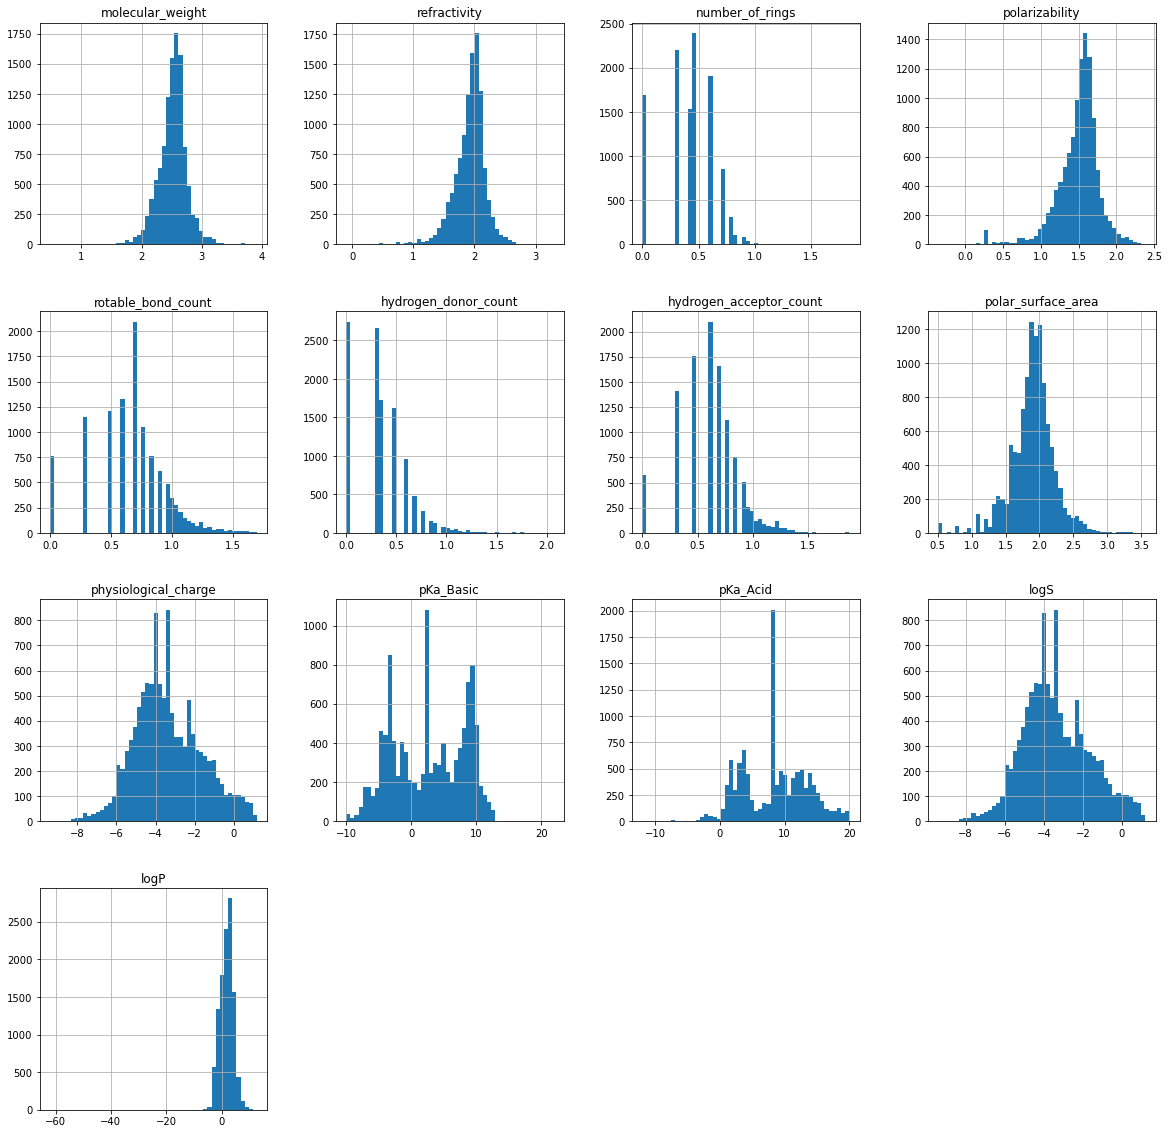

In [65]:
df_concat.hist(bins = 50 ,figsize=(20,20))


In [66]:
df_concat.to_pickle('df_filled')

In [77]:
df_numerical

mediaN = df_numerical.mean(numeric_only=True)
mediaN

molecular_weight           385.041182
logP                         1.812489
logS                        -3.381529
pKa_Acid                     8.462630
pKa_Basic                    2.688221
physiological_charge        -3.381529
polar_surface_area         103.252947
hydrogen_acceptor_count      5.375996
hydrogen_donor_count         2.663295
rotable_bond_count           6.352278
refractivity                99.349198
polarizability              38.350913
number_of_rings              2.660073
bioavailability              0.848564
dtype: float64

In [70]:
df_numerical.fillna(value = mediaN , inplace = True)

c:\Users\gabri\anaconda3\envs\Python3.8\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [73]:
df_numerical.to_pickle('df_num')